In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Activation

# 1. Загружаем данные MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Нормализуем данные и изменяем форму
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 2. Создаем модель с использованием функционального API
input_layer = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(10, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Training the model...")
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2, batch_size=64)

print("Model input:", model.input)
print("Model output:", model.output)



2024-12-27 23:34:34.655725: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735335274.790171  203208 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735335274.826981  203208 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-27 23:34:35.153368: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
W0000 00:00:1735335278.209035  203208 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libr

Training the model...
Epoch 1/2
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8043 - loss: 0.5978 - val_accuracy: 0.9816 - val_loss: 0.0541
Epoch 2/2
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9655 - loss: 0.1130 - val_accuracy: 0.9881 - val_loss: 0.0372
Model input: <KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=keras_tensor>
Model output: <KerasTensor shape=(None, 10), dtype=float32, sparse=False, name=keras_tensor_9>


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


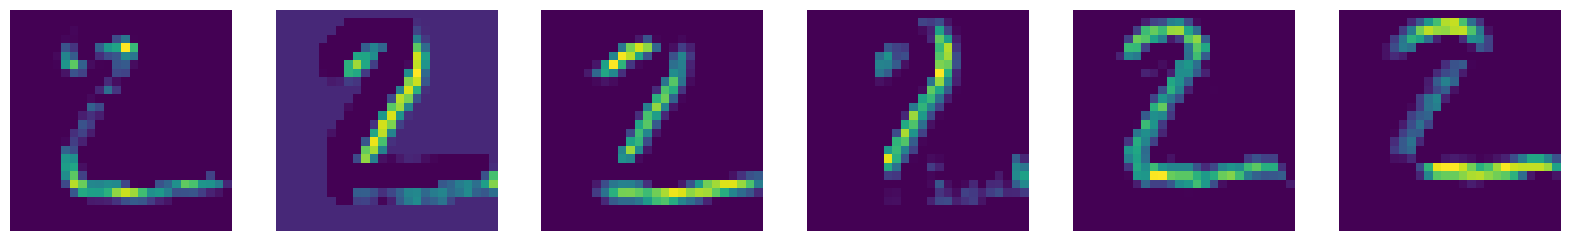

In [12]:
# 5. Создаем промежуточную модель для извлечения активаций
conv_layer_outputs = [layer.output for layer in model.layers if isinstance(layer, Conv2D)]
activation_model = Model(inputs=model.input, outputs=conv_layer_outputs)

# 6. Извлекаем активации для одного изображения
example_image = x_test[1].reshape(1, 28, 28, 1)
activations = activation_model.predict(example_image)

# 7. Визуализация активаций первого сверточного слоя
first_layer_activation = activations[0]
n_filters = first_layer_activation.shape[-1]

fig, axes = plt.subplots(1, 6, figsize=(20, 20))
for i in range(6):  # Показываем первые 6 фильтров
    axes[i].imshow(first_layer_activation[0, :, :, i], cmap='viridis')
    axes[i].axis('off')
plt.show()

# 7. Визуализация активаций первого сверточного слоя
second_layer_activation = activations[0]
n_filters = first_layer_activation.shape[-1]

fig, axes = plt.subplots(1, 6, figsize=(20, 20))
for i in range(6):  # Показываем первые 6 фильтров
    axes[i].imshow(first_layer_activation[0, :, :, i], cmap='viridis')
    axes[i].axis('off')
plt.show()


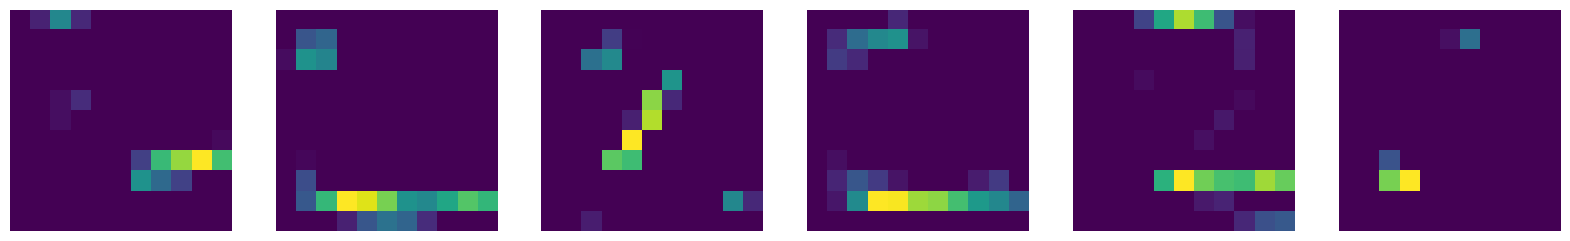

In [15]:
second_layer_activation = activations[1]
n_filters = second_layer_activation.shape[-1]

fig, axes = plt.subplots(1, 6, figsize=(20, 20))
for i in range(6):  # Покажем первые 6 фильтров
    axes[i].imshow(second_layer_activation[0, :, :, i], cmap='viridis')
    axes[i].axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Shape of first Dense layer activation: (1, 128)


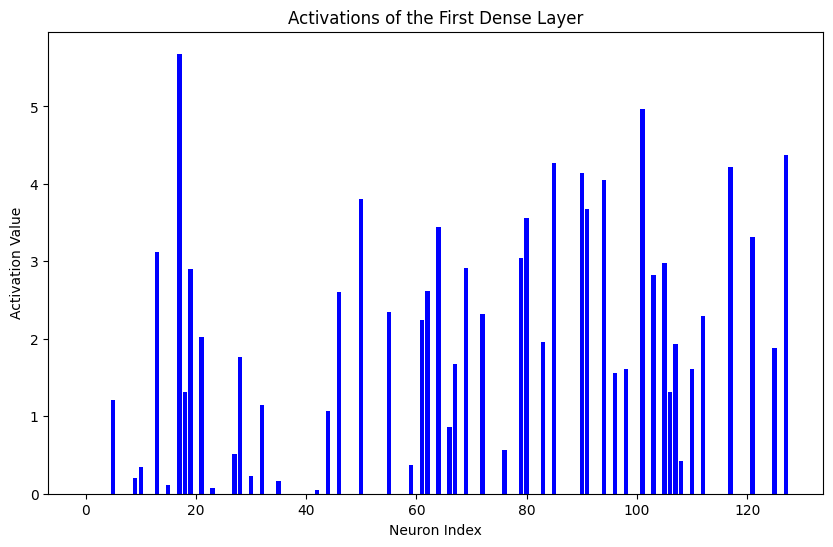

In [16]:
# 1. Обновляем промежуточную модель, добавляя Dense-слой
dense_layer_outputs = [layer.output for layer in model.layers if isinstance(layer, Dense)]
dense_activation_model = Model(inputs=model.input, outputs=dense_layer_outputs)

# 2. Пропускаем одно изображение через модель
dense_activations = dense_activation_model.predict(example_image)

# 3. Извлекаем активации первого Dense-слоя
first_dense_activation = dense_activations[0]  # Первый Dense-слой
print("Shape of first Dense layer activation:", first_dense_activation.shape)

# 4. Визуализируем активации первого Dense-слоя
plt.figure(figsize=(10, 6))
plt.bar(range(first_dense_activation.shape[1]), first_dense_activation[0], color='blue')
plt.xlabel('Neuron Index')
plt.ylabel('Activation Value')
plt.title('Activations of the First Dense Layer')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Shape of first Dense layer activation: (1, 10)


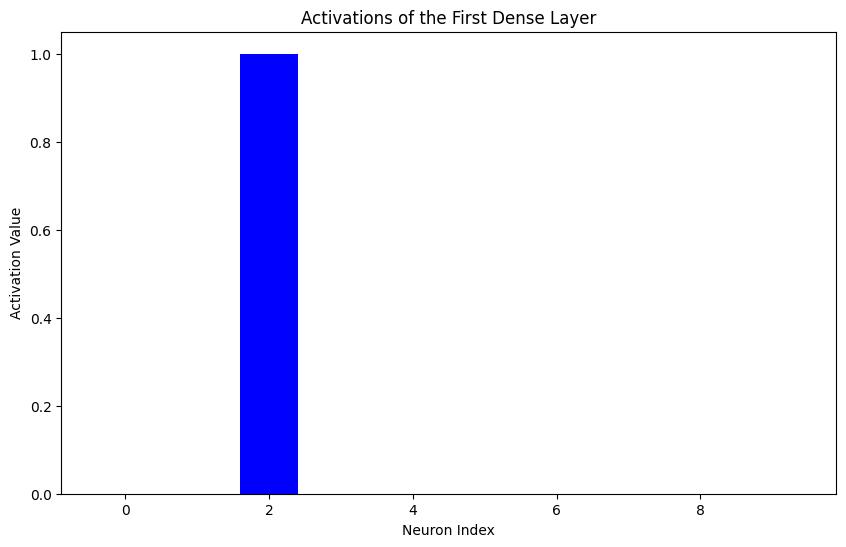

In [17]:
# 1. Обновляем промежуточную модель, добавляя Dense-слой
dense_layer_outputs = [layer.output for layer in model.layers if isinstance(layer, Dense)]
dense_activation_model = Model(inputs=model.input, outputs=dense_layer_outputs)

# 2. Пропускаем одно изображение через модель
dense_activations = dense_activation_model.predict(example_image)

# 3. Извлекаем активации первого Dense-слоя
second_dense_activation = dense_activations[1]  # Первый Dense-слой
print("Shape of first Dense layer activation:", second_dense_activation.shape)

# 4. Визуализируем активации первого Dense-слоя
plt.figure(figsize=(10, 6))
plt.bar(range(second_dense_activation.shape[1]), second_dense_activation[0], color='blue')
plt.xlabel('Neuron Index')
plt.ylabel('Activation Value')
plt.title('Activations of the Output Dense Layer')
plt.show()